### Import delle librerie

In [1]:
import urllib3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carica i dati estrapolati da NodeRED

In [2]:
http = urllib3.PoolManager()
r = http.request('GET', 'http://lopy.dokku.uni.it/lettura3')

### Conversione dei dati

In [3]:
dati = r.data.decode("utf-8") 
dati = dati.split('<br>')
del dati[-1]

In [4]:
for i in range(len(dati)):
    dati[i] = dati[i].split(',')
    dati[i] = [float(j) for j in dati[i]]
temp = pd.DataFrame(dati)

In [5]:
temp_aria = [0] * temp.shape[0];
um_aria = [0] * temp.shape[0];
pressione = [0] * temp.shape[0];
luce = [0] * temp.shape[0];
um_terreno = [0] * temp.shape[0];
temp_terreno = [0] * temp.shape[0];
temp_grappolo = [0] * temp.shape[0];
for i in range(len(dati)):
    temp_aria[i] = temp[6][i]
    um_aria[i] = temp[7][i]
    pressione[i] = temp[8][i]
    luce[i] = temp[9][i]
    um_terreno[i] = temp[10][i]
    temp_terreno[i] = temp[11][i]
    temp_grappolo[i] = temp[12][i]

### Plotting dei dati

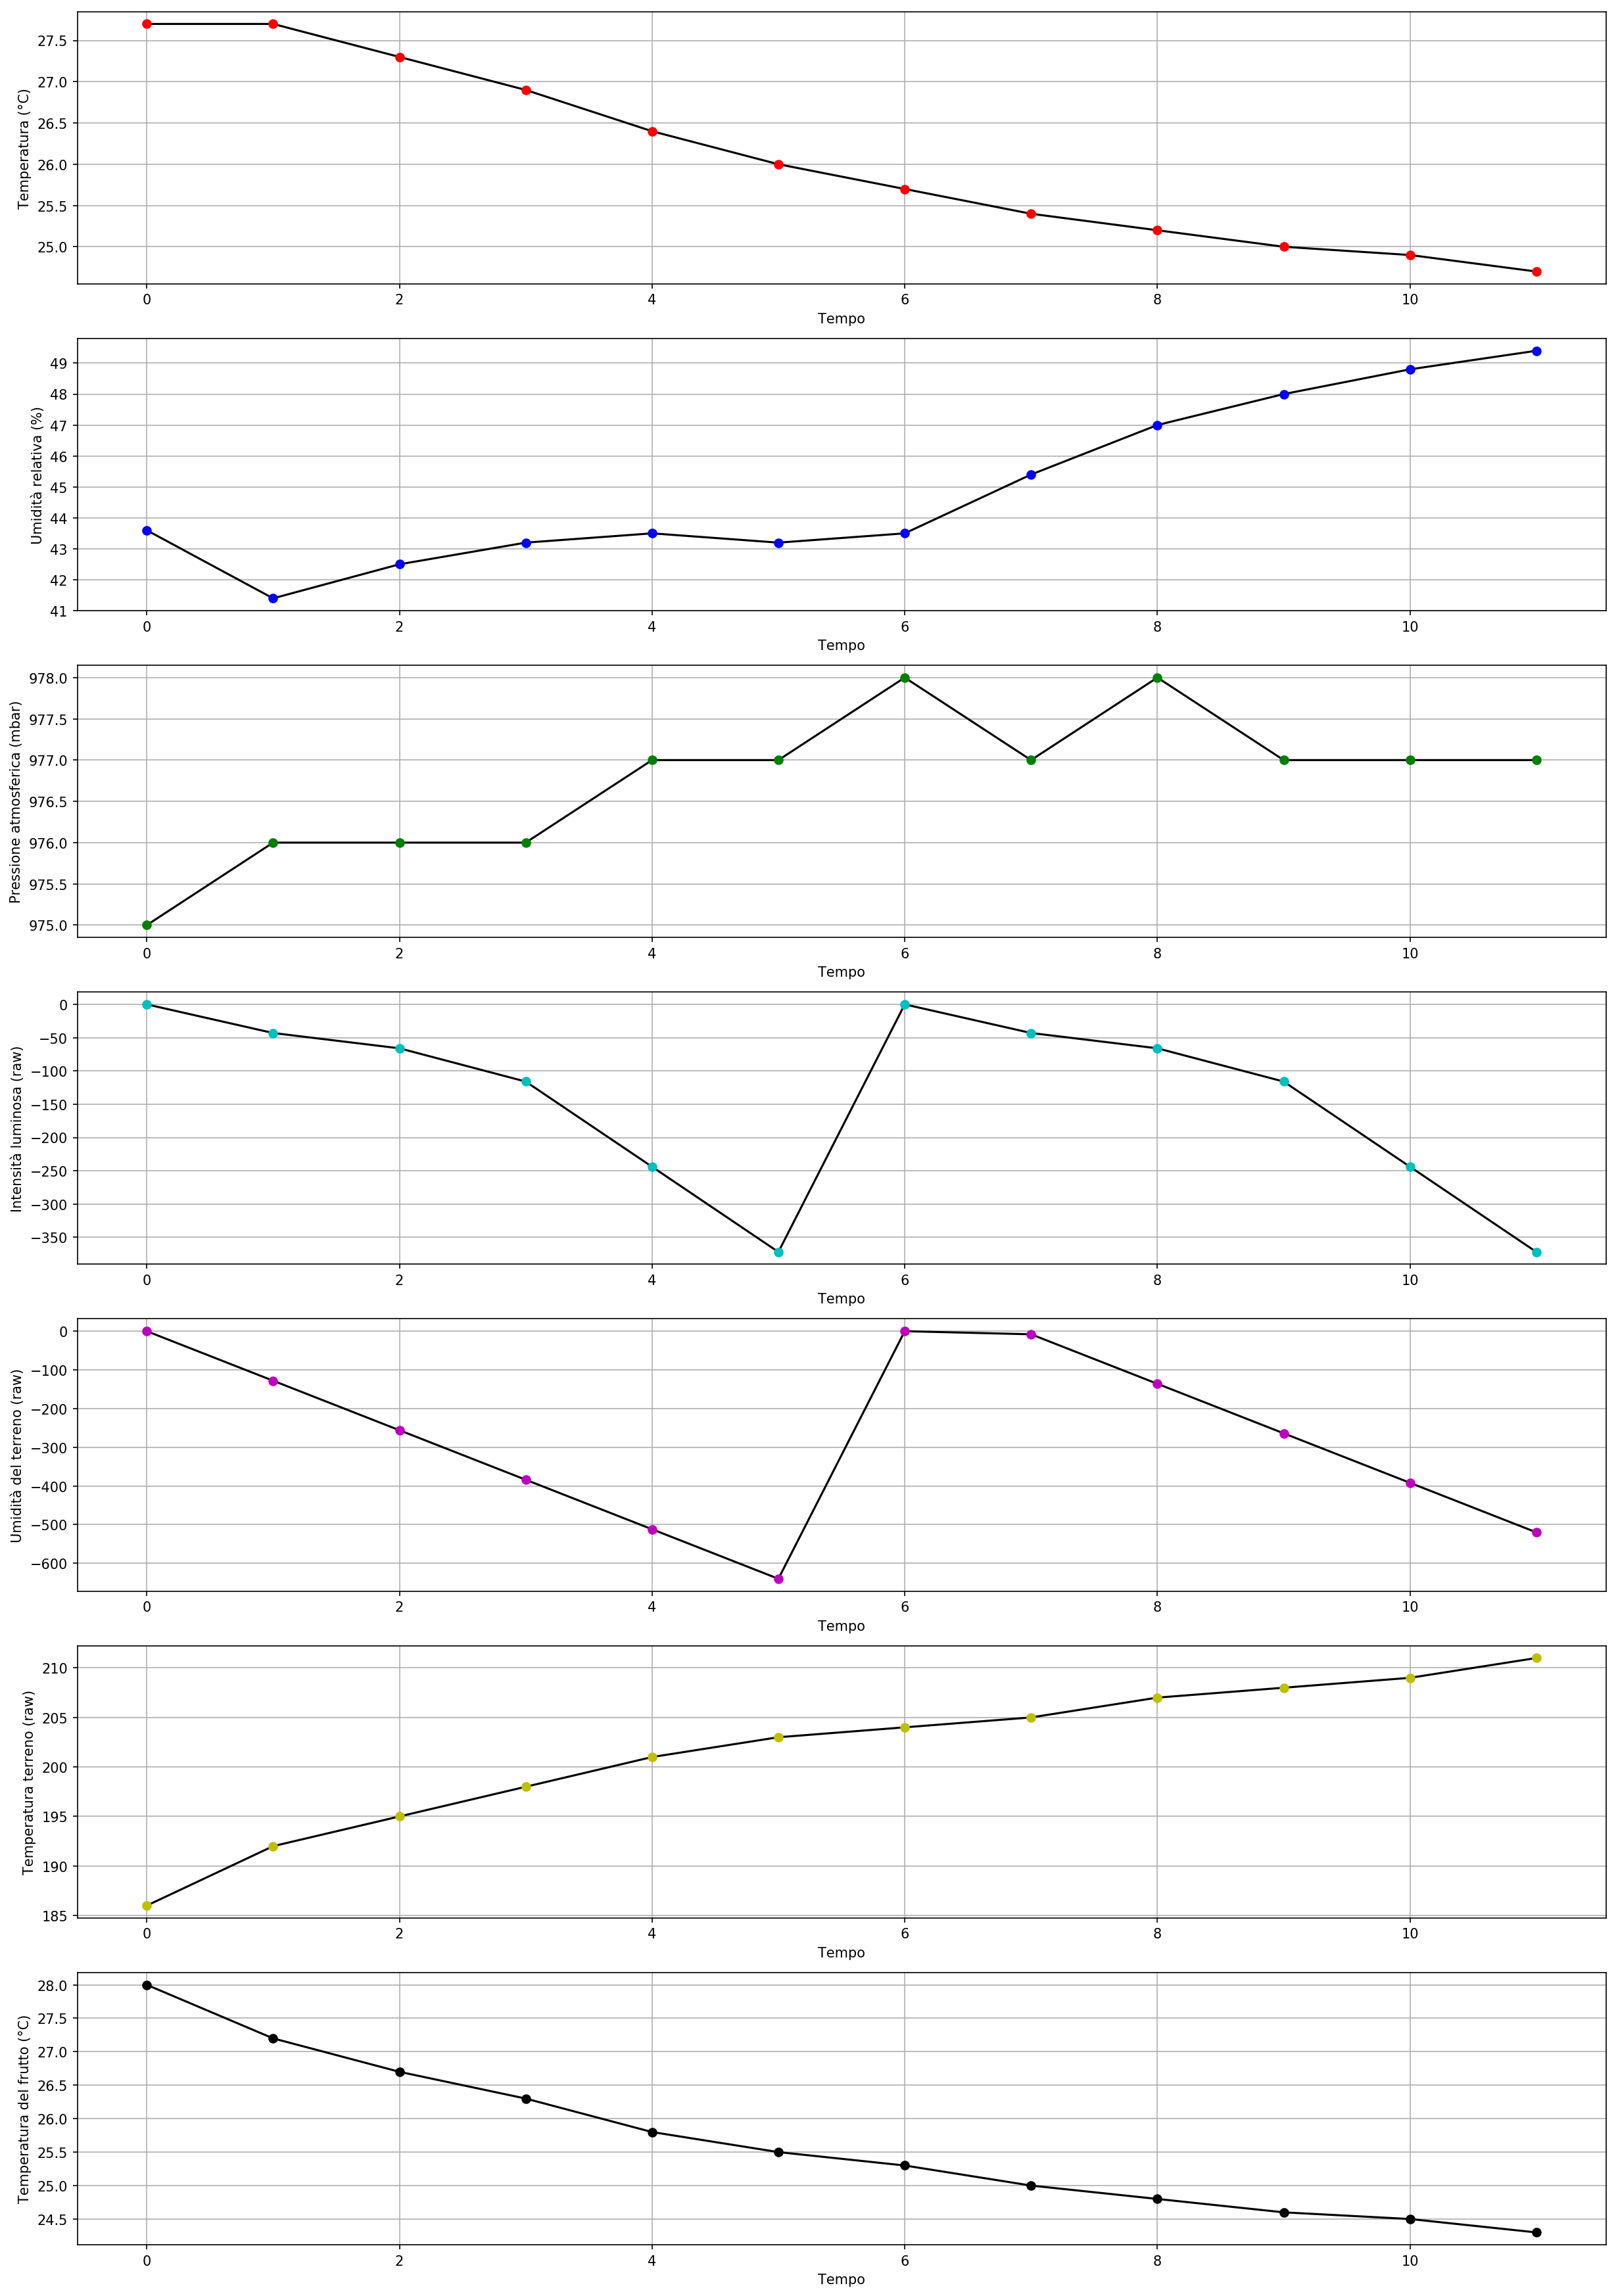

In [6]:
%matplotlib inline
plt.figure(figsize=(20, 30), dpi= 150, facecolor='w', edgecolor='k')

plt.subplot(7, 1, 1)
plt.grid(True)
plt.xlabel('Tempo')
plt.ylabel('Temperatura (°C)')
plt.plot(range(len(temp_aria)), temp_aria, 'k-', range(len(temp_aria)), temp_aria, 'ro')

plt.subplot(7, 1, 2)
plt.grid(True)
plt.xlabel('Tempo')
plt.ylabel('Umidità relativa (%)')
plt.plot(range(len(um_aria)), um_aria, 'k-', range(len(um_aria)), um_aria, 'bo')

plt.subplot(7, 1, 3)
plt.grid(True)
plt.xlabel('Tempo')
plt.ylabel('Pressione atmosferica (mbar)')
plt.plot(range(len(pressione)), pressione, 'k-', range(len(pressione)), pressione, 'go')

plt.subplot(7, 1, 4)
plt.grid(True)
plt.xlabel('Tempo')
plt.ylabel('Intensità luminosa (raw)')
plt.plot(range(len(luce)), luce, 'k-', range(len(luce)), luce, 'co')

plt.subplot(7, 1, 5)
plt.grid(True)
plt.xlabel('Tempo')
plt.ylabel('Umidità del terreno (raw)')
plt.plot(range(len(um_terreno)), um_terreno, 'k-', range(len(um_terreno)), um_terreno, 'mo')

plt.subplot(7, 1, 6)
plt.grid(True)
plt.xlabel('Tempo')
plt.ylabel('Temperatura terreno (raw)')
plt.plot(range(len(temp_terreno)), temp_terreno, 'k-', range(len(temp_terreno)), temp_terreno, 'yo')

plt.subplot(7, 1, 7)
plt.grid(True)
plt.xlabel('Tempo')
plt.ylabel('Temperatura del frutto (°C)')
plt.plot(range(len(temp_grappolo)), temp_grappolo, 'k-', range(len(temp_grappolo)), temp_grappolo, 'ko')